# <center>OLYMPICS ANALYTICS</center>

# CONTEXT
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.
</br>

The file athlete_events.csv contains **271116 rows and 15 columns**. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA

# DATA UNDERSTANDING

In [31]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATA

In [2]:
# load athletes data
athletes_df = pd.read_csv("data/athlete_events.csv")

# load region data
region_df = pd.read_csv("data/noc_regions.csv")

### EDA

In [12]:
# athletes data shape
athletes_df.shape

(271116, 15)

In [11]:
# athletes data shape
region_df.shape

(230, 3)

In [13]:
# display athletes data
athletes_df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [14]:
# display region data
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


#### NOTES
* Indeed the athletes data contains **271116 rows & 15 columns**, whereas, region data contains **230 rows & 3 columns**.
* Let's merge or join the two dataset based on **NOC** to get the corresponding Countries.

In [24]:
# merge athletes & region dataset
df = athletes_df.merge(region_df, how="left", on="NOC")
print("After Left Join or Merge the no. of columns increased from 15 to 17.")
df.head()

After Left Join or Merge the no. of columns increased from 15 to 17.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [23]:
# display
df[["Name","region","NOC"]].head()

,Name,region,NOC
0,A Dijiang,China,CHN
1,A Lamusi,China,CHN
2,Gunnar Nielsen Aaby,Denmark,DEN
3,Edgar Lindenau Aabye,Denmark,DEN
4,Christine Jacoba Aaftink,Netherlands,NED


In [26]:
# check null values
df.isnull().sum().sort_values(ascending=False)

notes     266077
Medal     231333
Weight     62875
Height     60171
Age         9474
region       370
Season         0
Event          0
Sport          0
City           0
ID             0
Year           0
Name           0
NOC            0
Team           0
Sex            0
Games          0
dtype: int64

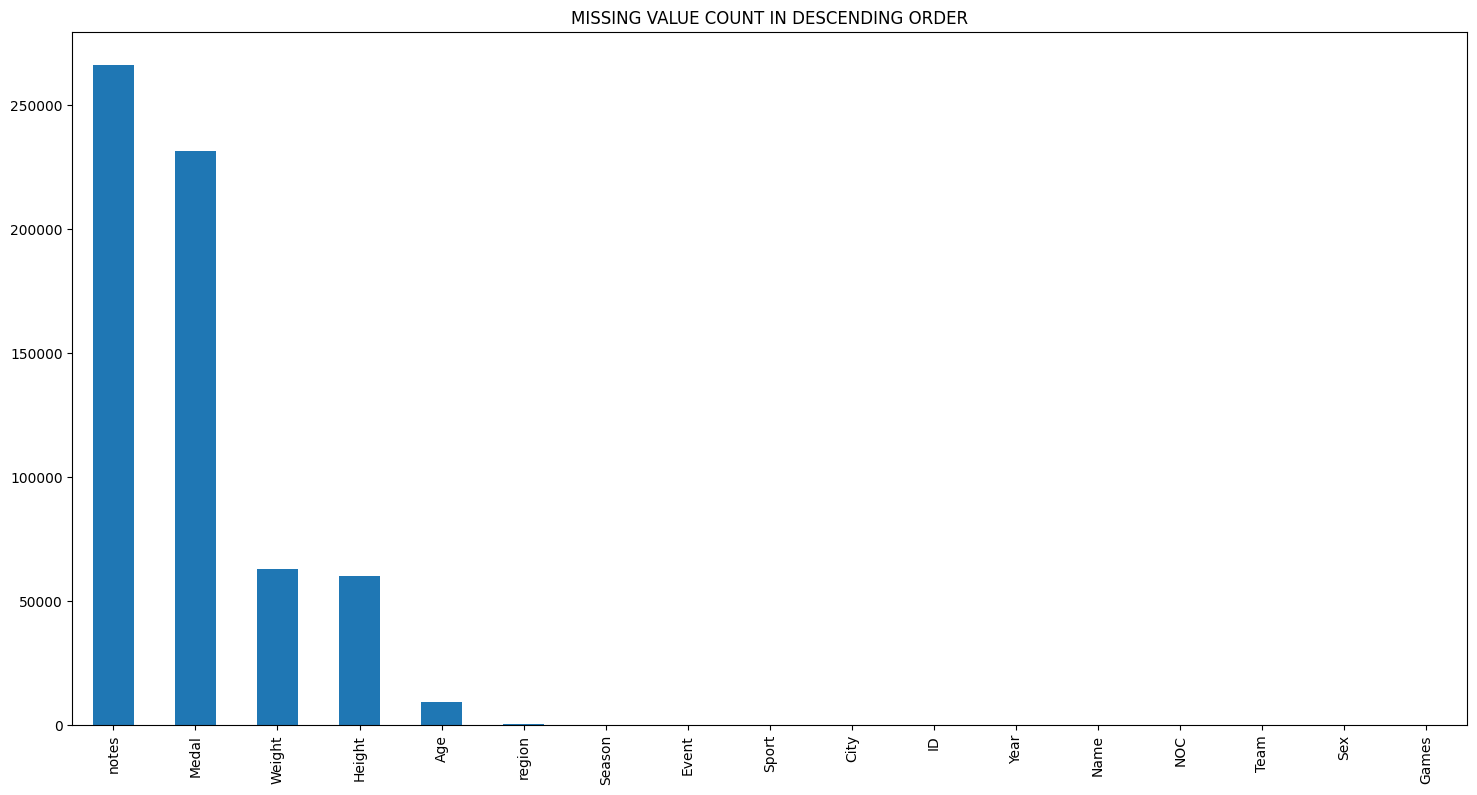

In [35]:
plt.figure(figsize=(18,9))
df.isnull().sum().sort_values(ascending=False).plot.bar(title="MISSING VALUE COUNT IN DESCENDING ORDER")
plt.show()

In [39]:
# duplicate rows
df.duplicated().sum()

1385

In [41]:
# remove duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

### SUMMER OLYMPICS ONLY 

In [43]:
summer_df = df[df["Season"] == "Summer"]
summer_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [44]:
# rows lost 
df.shape[0] - summer_df.shape[0]

48564